In [29]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [30]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv("Resources\lending_data.csv")

# Review the DataFrame
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [31]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df.loan_status

# Separate the X variable, the features
X = df.drop("loan_status", axis=1) # keep ALL features except for the target

In [32]:
# Review the y variable Series
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [33]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [34]:
# Check the balance of our target values
y.value_counts()

loan_status
0    75036
1     2500
Name: count, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [36]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.25)

print(X_train.shape)
print(X_test.shape)

(58152, 7)
(19384, 7)


---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [37]:
def doClassification(model, X_train, X_test, y_train, y_test):
    # predict
    train_preds = model.predict(X_train)
    train_probs = model.predict_proba(X_train)

    test_preds = model.predict(X_test)
    test_probs = model.predict_proba(X_test)

    # evaluate train
    train_cr = classification_report(y_train, train_preds)
    train_cm = confusion_matrix(y_train, train_preds)

    train_report = f"""
    Train Confusion Matrix: 
    {train_cm}

    Train Report: 
    {train_cr}
    """
    print("TRAINING METRICS")
    print(train_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_train, train_probs[:,1])
    roc_auc = roc_auc_score(y_train, train_probs[:,1])

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TRAINING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print()
    print()

    # evaluate test
    test_cr = classification_report(y_test, test_preds)
    test_cm = confusion_matrix(y_test, test_preds)

    test_report = f"""
    Test Confusion Matrix: 
    {test_cm}

    Test Report: 
    {test_cr}
    """
    print("TESTING METRICS")
    print(test_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_test, test_probs[:,1])
    roc_auc = roc_auc_score(y_test, test_probs[:,1])

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TESTING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [38]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
lr = LogisticRegression()

# Fit the model using training data
lr.fit(X_train, y_train)


LogisticRegression()

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

TRAINING METRICS

    Train Confusion Matrix: 
    [[55987   284]
 [  127  1754]]

    Train Report: 
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56271
           1       0.86      0.93      0.90      1881

    accuracy                           0.99     58152
   macro avg       0.93      0.96      0.95     58152
weighted avg       0.99      0.99      0.99     58152

    



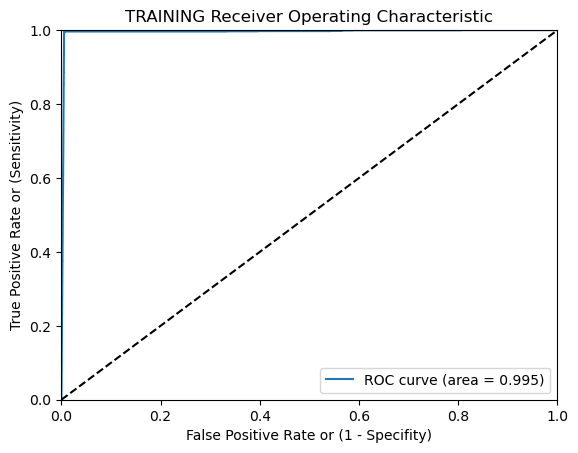



TESTING METRICS

    Test Confusion Matrix: 
    [[18655   110]
 [   36   583]]

    Test Report: 
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.94      0.89       619

    accuracy                           0.99     19384
   macro avg       0.92      0.97      0.94     19384
weighted avg       0.99      0.99      0.99     19384

    



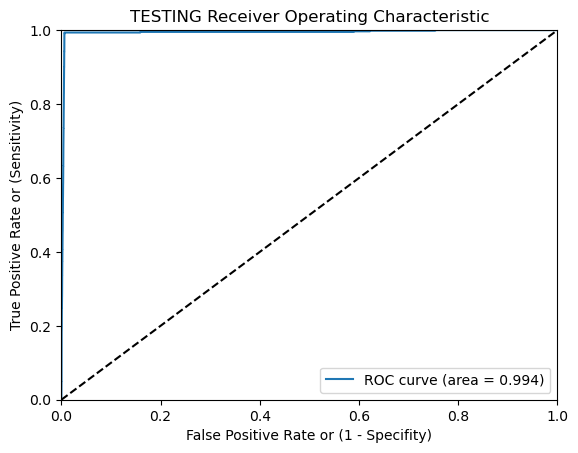

In [41]:
# Make a prediction using the testing data
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

doClassification(lr, X_train, X_test, y_train, y_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

TRAINING METRICS

    Train Confusion Matrix: 
    [[55987   284]
 [  127  1754]]

    Train Report: 
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56271
           1       0.86      0.93      0.90      1881

    accuracy                           0.99     58152
   macro avg       0.93      0.96      0.95     58152
weighted avg       0.99      0.99      0.99     58152

    



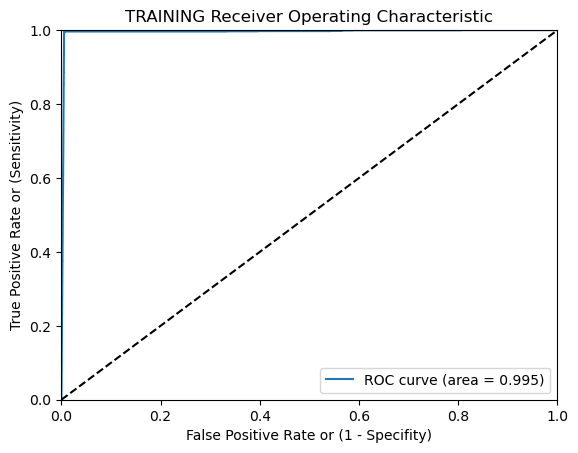



TESTING METRICS

    Test Confusion Matrix: 
    [[18655   110]
 [   36   583]]

    Test Report: 
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.94      0.89       619

    accuracy                           0.99     19384
   macro avg       0.92      0.97      0.94     19384
weighted avg       0.99      0.99      0.99     19384

    



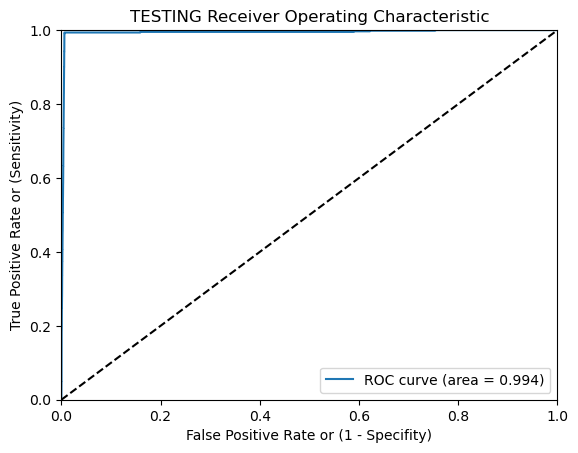

In [42]:
# Print the classification report for the model
doClassification(lr, X_train, X_test, y_train, y_test)

### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The training model was slightly overfitted, while the testing model did better
despite the precision and ROC curve being slightly less than the training model. 

C:\ProgramData\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


TRAINING METRICS

    Train Confusion Matrix: 
    [[55967   304]
 [    9  1872]]

    Train Report: 
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56271
           1       0.86      1.00      0.92      1881

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       1.00      0.99      0.99     58152

    



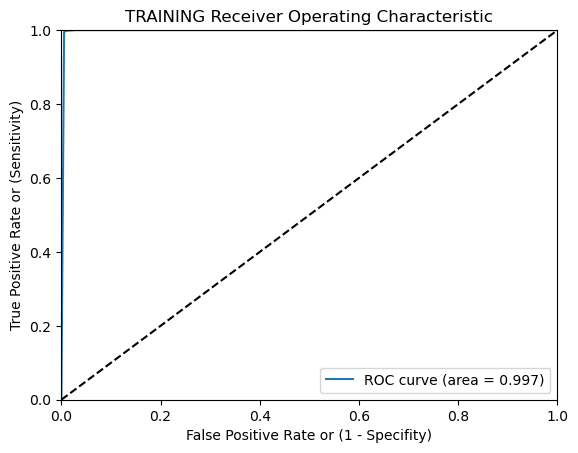



TESTING METRICS

    Test Confusion Matrix: 
    [[18650   115]
 [    4   615]]

    Test Report: 
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384

    



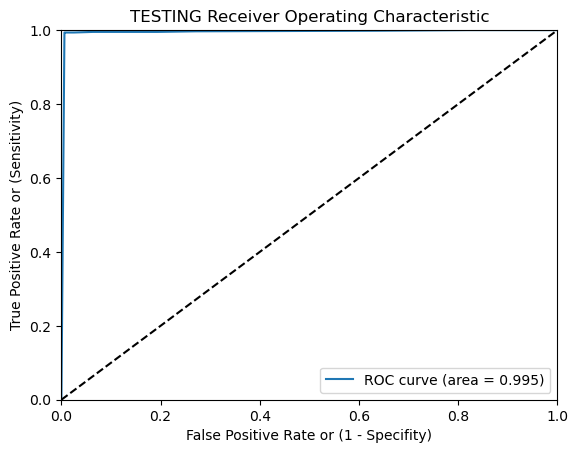

In [52]:
# try a different model for comparison

# import the dependencies
from sklearn.ensemble import AdaBoostClassifier

# initialize
ada = AdaBoostClassifier(random_state=42)

# fit
ada.fit(X_train, y_train)

doClassification(ada, X_train, X_test, y_train, y_test)

TRAINING METRICS

    Train Confusion Matrix: 
    [[55980   291]
 [    8  1873]]

    Train Report: 
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56271
           1       0.87      1.00      0.93      1881

    accuracy                           0.99     58152
   macro avg       0.93      1.00      0.96     58152
weighted avg       1.00      0.99      1.00     58152

    



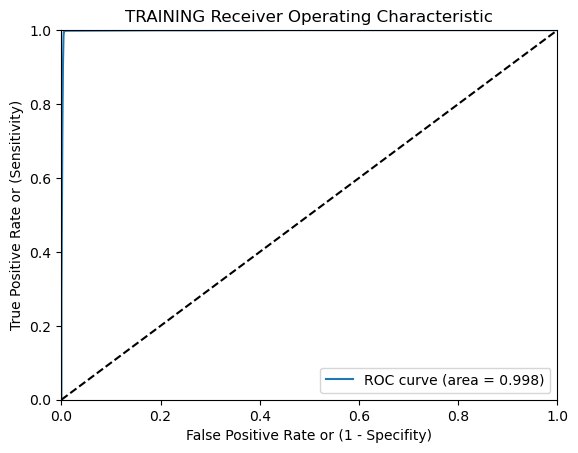



TESTING METRICS

    Test Confusion Matrix: 
    [[18652   113]
 [    6   613]]

    Test Report: 
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384

    



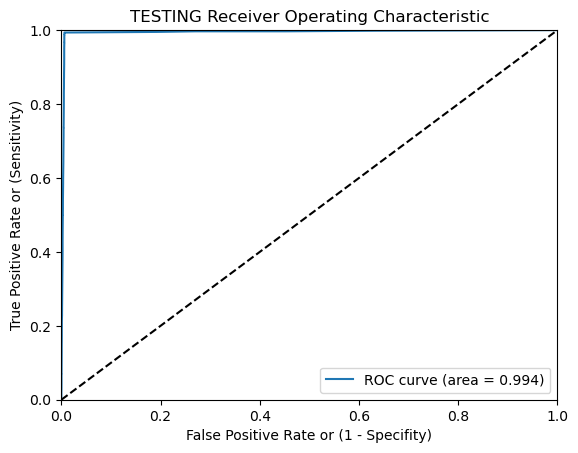

In [57]:
# try thr gradient boosting model

# import the dependencies
from sklearn.ensemble import GradientBoostingClassifier

# initialize
gb = GradientBoostingClassifier(random_state=42)

# fit
gb.fit(X_train, y_train)

doClassification(gb, X_train, X_test, y_train, y_test)

In [55]:
# credit to prof booth for feature/importance codes
# importance placed on the features in the ada model
ada_i = pd.DataFrame(zip(X.columns, ada.feature_importances_), columns=["feature", "importance"])
ada_i.sort_values(by="importance", ascending=False)

,feature,importance
1,interest_rate,1.0
0,loan_size,0.0
2,borrower_income,0.0
3,debt_to_income,0.0
4,num_of_accounts,0.0
5,derogatory_marks,0.0
6,total_debt,0.0


In [58]:
# credit to prof booth for feature/importance codes
# importance placed on the features in the gradiant model
fi = pd.DataFrame(zip(X.columns, gb.feature_importances_), columns=["feature", "importance"])
fi.sort_values(by="importance", ascending=False)

,feature,importance
1,interest_rate,0.848580
2,borrower_income,0.084580
0,loan_size,0.046022
6,total_debt,0.013919
3,debt_to_income,0.006765
4,num_of_accounts,0.000134
5,derogatory_marks,0.000000


---